In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 as cv 

In [2]:
# Load and preprocess the image
img_path = 'S:\\Machine Learning\\Siddharthan Playlist\\Projects\\E_KYC_USING_COMPUTER_VISION\\WhatsApp Image 2024-07-30 at 19.32.08_eba7bab2.jpg' 
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
blurred_image = cv.GaussianBlur(gray_img, (3, 3), 0)
threshold_img = cv.adaptiveThreshold(blurred_image, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 21, 2)

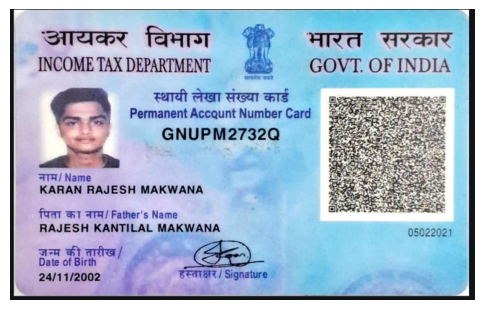

In [3]:

plt.figure(figsize=(6,8)) 
plt.imshow(img) 
plt.axis("off") 
plt.show() 

In [4]:
def sobel_edge_detection(gray_img):
    sobelx = cv.Sobel(gray_img, cv.CV_64F, 1, 0, ksize=3)
    sobely = cv.Sobel(gray_img, cv.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    angle = np.arctan2(sobely, sobelx)
    return magnitude

In [5]:
def laplacian_edge_detection(gray_img):
    laplacian = cv.Laplacian(gray_img, cv.CV_64F)
    laplacian_uint32 = np.uint32(np.absolute(laplacian)) 
    return laplacian_uint32

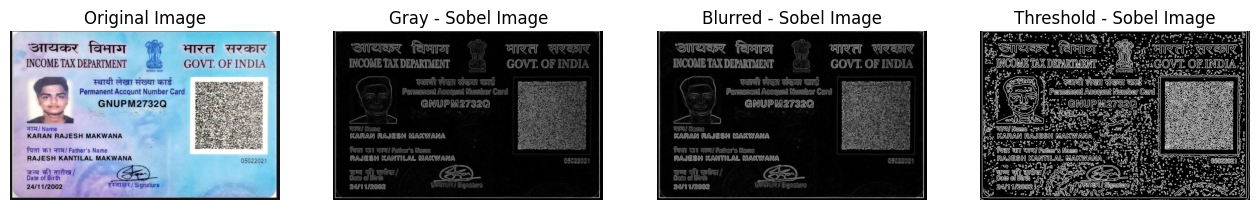

In [6]:
plt.figure(figsize=(16,6)) 

plt.subplot(1,4,1)
plt.imshow(img)
plt.axis("off") 
plt.title("Original Image") 

plt.subplot(1,4,2)
plt.imshow(sobel_edge_detection(gray_img).astype(np.int16), cmap='gray') 
plt.axis("off")
plt.title("Gray - Sobel Image")

plt.subplot(1,4,3)
plt.imshow(sobel_edge_detection(blurred_image).astype(np.int16), cmap='gray') 
plt.axis("off")
plt.title("Blurred - Sobel Image")

plt.subplot(1,4,4)
plt.imshow(sobel_edge_detection(threshold_img).astype(np.int16), cmap='gray') 
plt.axis("off")
plt.title("Threshold - Sobel Image")
plt.show() 

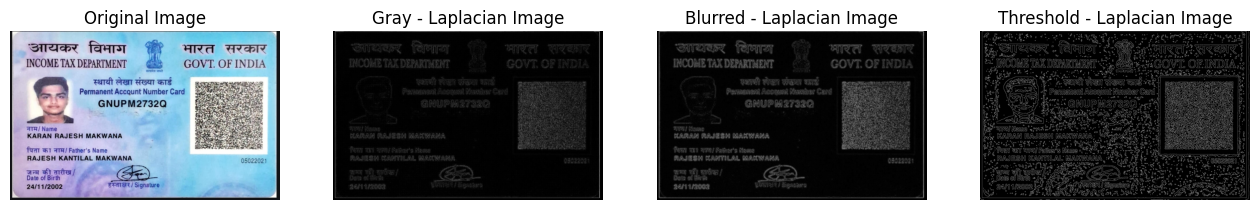

In [7]:

plt.figure(figsize=(16,6)) 

plt.subplot(1,4,1)
plt.imshow(img)
plt.axis("off") 
plt.title("Original Image") 

plt.subplot(1,4,2)
plt.imshow(laplacian_edge_detection(gray_img), cmap='gray') 
plt.axis("off")
plt.title("Gray - Laplacian Image")

plt.subplot(1,4,3)
plt.imshow(laplacian_edge_detection(blurred_image), cmap='gray') 
plt.axis("off")
plt.title("Blurred - Laplacian Image")

plt.subplot(1,4,4)
plt.imshow(laplacian_edge_detection(threshold_img), cmap='gray') 
plt.axis("off")
plt.title("Threshold - Laplacian Image")
plt.show() 



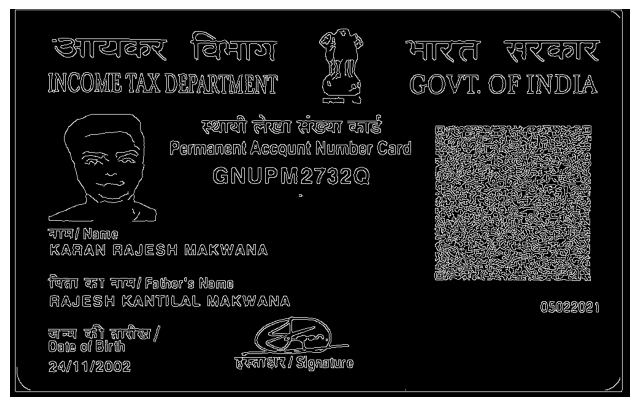

In [8]:
plt.figure(figsize=(8,12))
edges = cv.Canny(blurred_image, 100, 200)
plt.imshow(edges, cmap='gray') 
plt.axis("off") 
plt.show() 

In [9]:
def find_largest_contour_with_buffer(img, buffer_percentage=0.1):
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    largest_contour, largest_area = None, 0

    for cnt in contours:
        area = cv.contourArea(cnt)
        if area > largest_area:
            largest_area = area
            largest_contour = cnt

    x, y, w, h = cv.boundingRect(largest_contour)

    buffer_amount_x = int(w * buffer_percentage)
    buffer_amount_y = int(h * buffer_percentage)
    x = max(0, x - buffer_amount_x) 
    y = max(0, y - buffer_amount_y)
    w = min(img.shape[1], w + 2 * buffer_amount_x)
    h = min(img.shape[0], h + 2 * buffer_amount_y)

    return x, y, w, h

In [10]:
def find_largest_contour(img):
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv.contourArea)
    x, y, w, h = cv.boundingRect(largest_contour)

    return x, y, w, h

0 0 1011 632


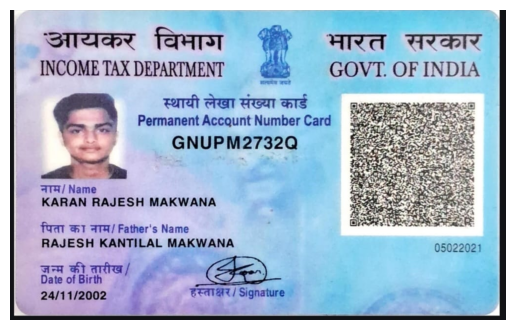

In [11]:
def find_largest_contour(img):
    contours, hierarchy = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv.contourArea)
    x, y, w, h = cv.boundingRect(largest_contour)

    return x, y, w, h

x, y, w, h = find_largest_contour(blurred_image) 
print(x,y,w,h) 

plt.imshow(img[y:y+h, x:x+w])
plt.axis("off") 
plt.show()  

contours (8, 1, 990, 623)
Area 614096.5


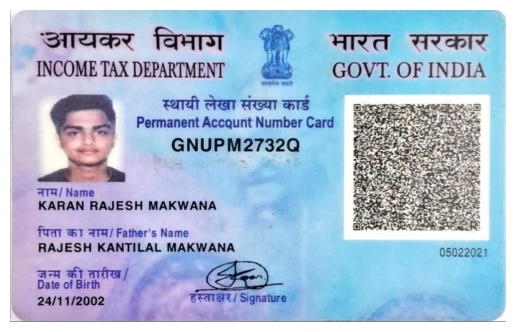

In [12]:

contours, _ = cv.findContours(threshold_img, mode = cv.RETR_EXTERNAL, method = cv.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

# len(contours)